<a href="https://colab.research.google.com/github/Werick/Google_colab/blob/master/Linear%20and%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# get some dataset from sklearn
from sklearn.datasets import  load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target

In [ ]:
# Investigate the dataset
# get the number of records and columns
boston.shape

(506, 14)

In [ ]:
# get the columns
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# list some few records
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Check out and handle Missing Data
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

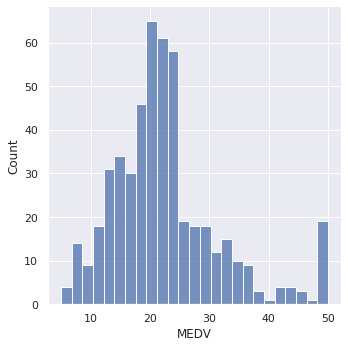

In [ ]:
# Exploratory Data Analysis
sns.set(rc={'figure.figsize': (11.7,8.27)})
sns.displot(boston["MEDV"], bins =25)
plt.show()

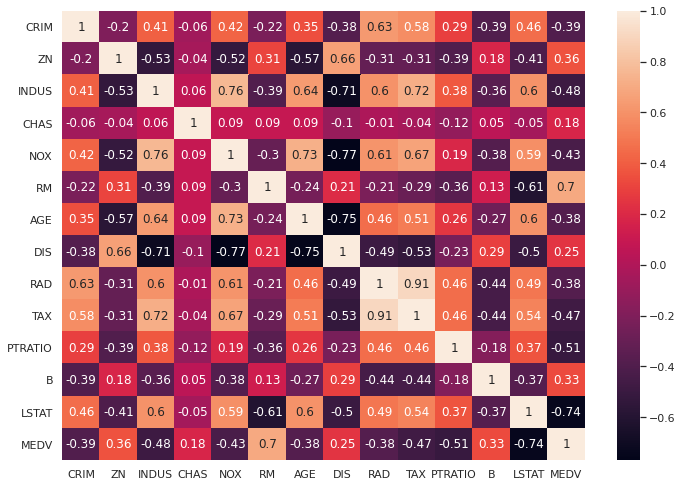

In [ ]:
# Correlation
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

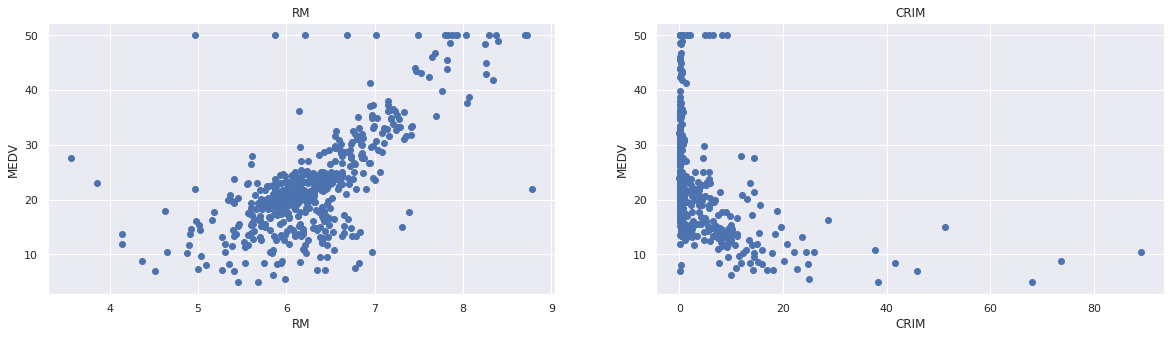

In [ ]:
plt.figure(figsize=(20,5))
features = ['RM', 'CRIM']
target = boston['MEDV']
for i, col  in enumerate(features):
  plt.subplot(1,len(features), i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

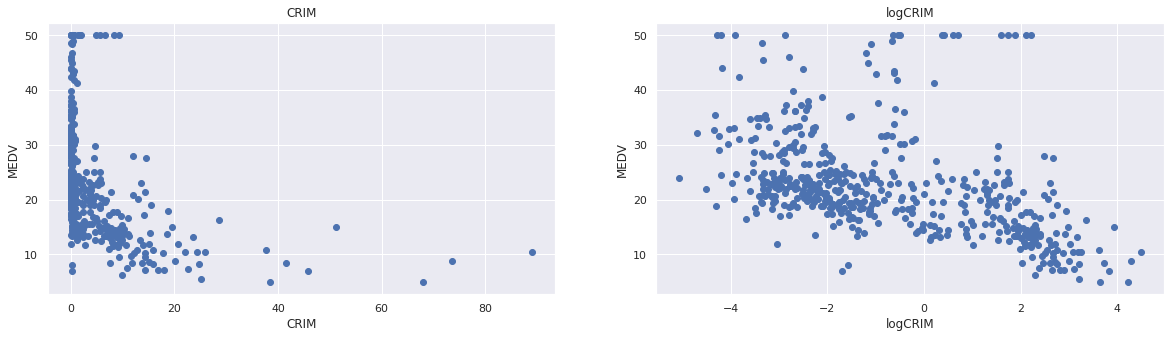

In [ ]:
# Logtransformation of CRIME col to get some linear r/ship
plt.figure(figsize=(20,5))
boston['logCRIM'] = np.log(boston['CRIM'])
features = ['CRIM', 'logCRIM']
target = boston['MEDV']
for i, col  in enumerate(features):
  plt.subplot(1,len(features), i+1)
  x = boston[col]
  y = target
  plt.scatter(x,y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')


In [8]:
# Load/Read 2015-2016 wace of NHANES data
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# drop unused columns and drop rows with missing values
vars = ['BPXSY1', "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


In [9]:
# Simple Linear Regression (LR)
# The Outcome variable (DV) is BPXSY1 - systolic blood pressure
# The Predictor variable (IV) is  RIDAGEYR - Age
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
# display the result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          2.09e-259
Time:                        09:23:10   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# standard deviation
da.BPXSY1.std()

18.486559500781865

In [16]:
# R-Squared and Correlation
cc = da[["BPXSY1","RIDAGEYR"]].corr()
print(cc)
print(cc.BPXSY1.RIDAGEYR)
print(cc.BPXSY1.RIDAGEYR**2)

            BPXSY1  RIDAGEYR
BPXSY1    1.000000  0.455142
RIDAGEYR  0.455142  1.000000
0.4551423911831136
0.20715459625188243


In [17]:
# Calculating R-squared from fitted values (predictions of BP for each person in the dataset, based on their covariate values)
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0,1]**2)

0.20715459625186952


In [19]:
# Add more variables to the model
da["gender"] = da['RIAGENDR'].replace({1:"Male",2:"Female"})
# Simple Linear Regression (LR)
# The Outcome variable (DV) is BPXSY1 - systolic blood pressure
# The Predictor variables (IV) are  RIDAGEYR - Age, Gender
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + gender", data=da)
result = model.fit()
# display the result
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          1.87e-268
Time:                        09:40:08   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        100.6305      0.712    141.257      0.000      99.234     102.027
gender[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR           0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Check the r/ship btweb age and gender
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


In [21]:
# Model with three vars
# Simple Linear Regression (LR)
# The Outcome variable (DV) is BPXSY1 - systolic blood pressure
# The Predictor variables (IV) are  RIDAGEYR - Age, Gender, BMXBMI - bmi
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + gender", data=da)
result = model.fit()
# display the result
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          8.54e-286
Time:                        09:49:29   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         91.5840      1.198     76.456      0.000      89.236      93.932
gender[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR           0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI             0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

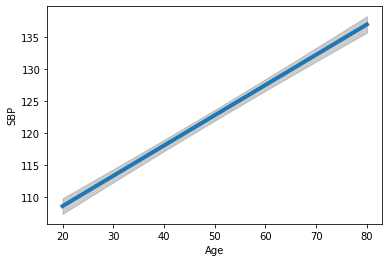

In [24]:
# Visualization the fitted models
from statsmodels.sandbox.predict_functional import  predict_functional

# Fix certain variables at reference values. Not all of these
# Variables are used here, but we provide them with a value anyway
# to prevent a warning msg from appearing
values = {"gender":"Female", "RIAGENDR":1, "BMXBMI": 25, "DMDEDUC2":1, "RIDRETH1":1, "SMQ020":1}

# the returned values are predicted value (pr), the confidence interval (ci)
# the fuction values (fv)
pr, ci, fv = predict_functional(result, "RIDAGEYR", values = values, ci_method = "simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, ci[:,0], ci[:,1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

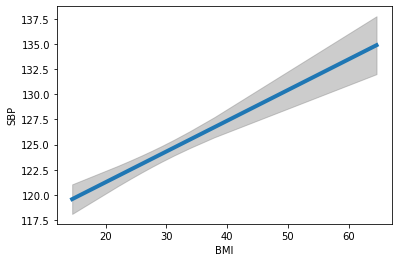

In [25]:
# Similar plot for BMI
del values['BMXBMI'] # Delete this as it is now the focus variable
values["RIDAGEYR"] = 50

#r/ship btwn expected SBP and AGE for women at 50
pr, ci, fv = predict_functional(result, "BMXBMI", values = values, ci_method = "simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, ci[:,0], ci[:,1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

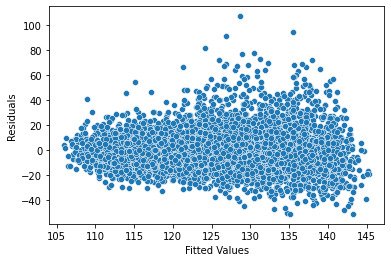

In [26]:
## Reseduals
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted Values")
_ = pp.set_ylabel("Residuals")

In [27]:
# Logistic Regression
da["smq"] = da.SMQ020.replace({2:0,7:np.nan,9:np.nan})

In [33]:
# two way tab
c= pd.crosstab(da.gender, da.smq).apply(lambda x: x/x.sum(), axis = 1)
c["odds"] = c.loc[:,1]/c.loc[:,0]
c

smq,0.0,1.0,odds
gender,,,
Female,0.680197,0.319803,0.470162
Male,0.467453,0.532547,1.139252


In [34]:
# Odd Ratio
c.odds.Male / c.odds.Female

2.423105552613186

In [35]:
# Logistic Regression
model2 = sm.GLM.from_formula("smq ~ gender", family=sm.families.Binomial(), data=da)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Thu, 05 Nov 2020   Deviance:                       6701.2
Time:                        10:30:51   Pearson chi2:                 5.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7547      0.042    -18.071      0.000      -0.837      -0.673
gender[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
==================================================================================
"""

In [36]:
# Logistic Regression
# add additional var
model2 = sm.GLM.from_formula("smq ~ gender + RIDAGEYR", family=sm.families.Binomial(), data=da)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Thu, 05 Nov 2020   Deviance:                       6593.2
Time:                        10:33:07   Pearson chi2:                 5.10e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6166      0.095    -16.985      0.000      -1.803      -1.430
gender[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR           0.0172      0.002     10.289      0.000       0.014       0.021
==================================================================================
"""